# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Problem Definition----

In this project,I am going to examine a set of job postings with salaries and then predict salaries for a new set of job postings.To complete the task, I have 3 data files supplied in csv format:


* **train_features.csv**: Each row represents metadata for an individual job posting.
The “jobId” column represents a unique identifier for the job posting. The remaining columns describe features of the job posting.
* **train_salaries.csv**: Each row associates a “jobId” with a “salary”.
* **test_features.csv**: Similar to train_features.csv, each row represents metadata for an individual job posting.
The first row of each file contains headers for the columns. Keep in mind that the metadata and salary data may contain errors.



In [1]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__author__ = "Bhupen Oli"
__email__ = "b.pen.oli39@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
train_features_df=pd.read_csv('data/train_features.csv')
train_targets_df=pd.read_csv('data/train_targets.csv')
test_features_df=pd.read_csv('data/test_features.csv')

### ---- 3 Clean the data ----

#### Examine the data

In [3]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


We can see same number of columns in training dataset and testing dataset are identical and does not need further actions to make them identical.

In [5]:
train_targets_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


We can see that target variable 'salary' is mentioned in number of thousands, so 130 means 130k dollar per annum.

#### Let's check the lenght of dataset and datatypes of each columns

In [6]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


Data types of columns and number of entries in both train dataset and test dataset are same.Target dataset has jobID and salary in object and numeric data types respectively which was as expected.

#### Let's check for duplicates

In [9]:
train_features_df.duplicated().sum()

0

In [10]:
test_features_df.duplicated().sum()

0

In [11]:
train_targets_df.duplicated().sum()

0

We can see no duplicate records in all 3 datasets, so we don't need to handle duplicates.

### ---- 4 Exploring the data (EDA) ----

#### separating numerical and categorical variables in train_features dataset.

In [12]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

By looking at the columns and their data types, columns are manually divided into numerical and categorical type.

In [13]:
numerical_column=['yearsExperience','milesFromMetropolis']
categorical_column=['jobType','degree','major','industry']
target_variable="salary"

#### Let's summarize numerical and categorical variable

In [14]:
train_features_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [15]:
train_features_df.describe(include=[np.object])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685132693,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


#### Let's merge features and targets from training dataset and delete original dataset

In [16]:
train_df=pd.merge(train_features_df,train_targets_df,on='jobId')
train_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [17]:
#del train_features_df
#del train_targets_df

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### ploting the distribution of target variable, categorical data and numerical data and target variable(salary)

Defining a function which will visually explore all data

In [19]:
#this function explores each categorical and numerical data visually
def visual_eda(df,numeric_columns,categorical_columns,target_variable):
    count_category=len(categorical_columns)
    count_numeric=len(numeric_columns)
   # ("Exploring distribution of target variables")
        
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[target_variable])
    plt.subplot(1,2,2)
    sns.distplot(df[target_variable],bins=25)
    
    
    fig=plt.figure(figsize=(15,12))
   # ('Exploring distribution of numeric columns')
    
    for i in range(0,count_numeric+1,2):
        num_index=int(i/2)
        ax=fig.add_subplot(count_numeric,2,i+1)
        sns.boxplot(df[numeric_columns[num_index]])
        ax=fig.add_subplot(count_numeric,2,i+2)
        sns.distplot(df[numeric_columns[num_index]])
    
    fig=plt.figure(figsize=(15,12))
   # ('Exploring distribution of different categories')
    for i in range(0,count_category):
        ax=fig.add_subplot(math.ceil(count_category/2),2,i+1)
        ax.plot(df[categorical_columns[i]].value_counts())
        plt.xlabel(categorical_columns[i])
        plt.xticks(rotation=45)
    plt.show()


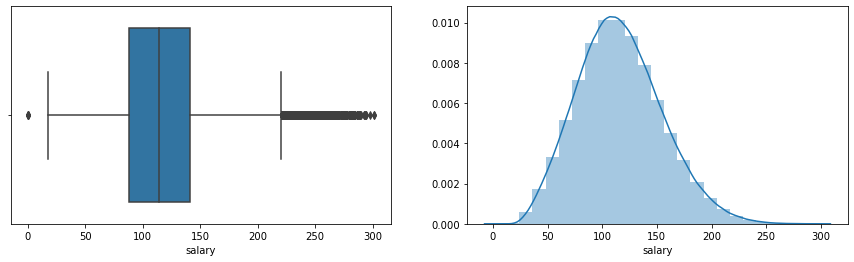

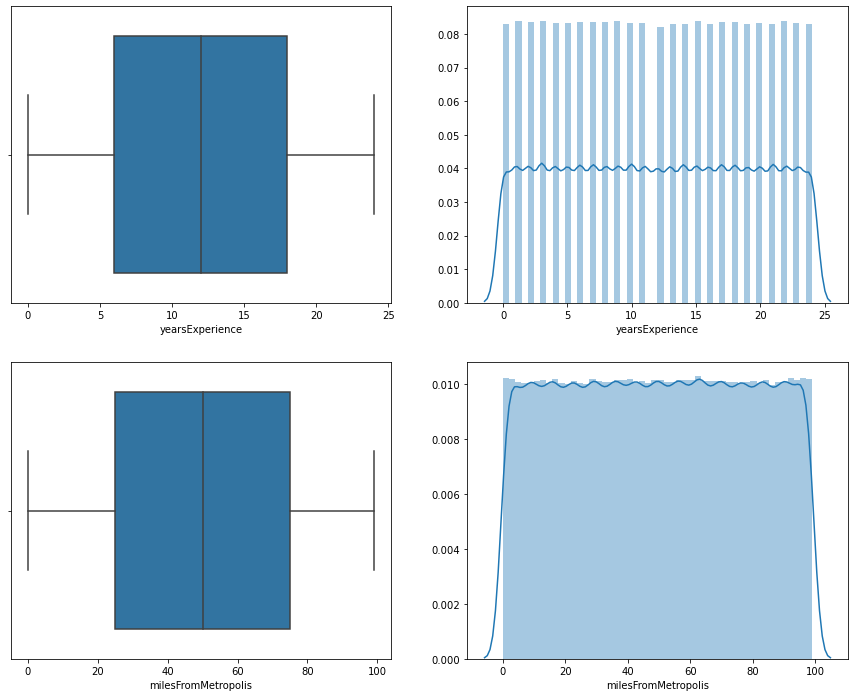

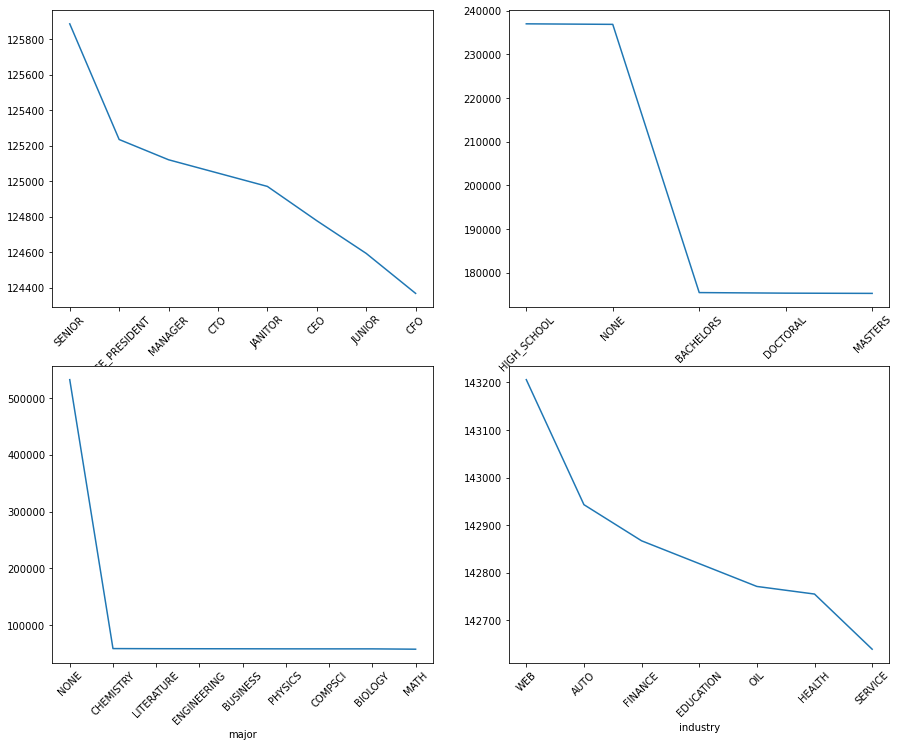

In [20]:
#call the function for visual exploration
visual_eda(train_df,numerical_column,categorical_column,target_variable)

plots above clearly shows almost normal distribution with certain outliers(salary of zero values and above 250k), which needs further investigation.

#### Finding upper and lower values using IQR rule

In [21]:
target_stat=train_df.salary.describe()
print(target_stat)
IQR=target_stat['75%']-target_stat['25%']
lower_value=target_stat['25%']- 1.5*IQR
upper_value=target_stat['75%']+ 1.5*IQR
print('\nThe lower value is',lower_value)
print('The upper value is',upper_value)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

The lower value is 8.5
The upper value is 220.5


#### Examining the outliers (above the upper value and below lower value)

In [22]:
train_df.loc[train_df['salary']>upper_value,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

Although senior roles earning above 220.5k is normal but junior position earning seems suspicious,let's further examine those junior position earning more than 220.5k.

In [23]:
train_df[(train_df['salary']>upper_value) & (train_df['jobType']=='JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Although junior in position, most of those earning more than upper value either have master and doctoral degree or work in oil industry. So this data looks quite obvious and does not need to be removed.

In [24]:
train_df[train_df['salary']<lower_value]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


This table shows many employee with higher degree with many years experience but earning 0, which is obviously wrong.We need to delete these data with salary less than lower limit.

In [25]:
train_df=train_df[train_df['salary']>lower_value]

We are going to explore each feature variable against the target variable(salary) to see if there is any correlation.**visual_eda_relation** function is defined which can be used to explore each feature variable.This function plots  relation of categorical and numerical variable with target(salary) on right side.

In [26]:
#this function will visualize the relationship between different categorical and numerical variable with the target variable
def visual_eda_relation(df,num_col,cat_col,target_var):
    count_cat=len(cat_col)
    count_num=len(num_col)
    #plot the relation of numeric variables(mean and standard deviation) with target variable
    fig=plt.figure(figsize=(15,3))
    
    for i in range(0,count_num):
        ax=fig.add_subplot(math.ceil(count_num/2),2,i+1)
        sns.lineplot(x=num_col[i],y=target_var,data=df,ci="sd")
    
    #plot the relation of categorical variable with target variable in ascending order
    fig=plt.figure(figsize=(15,20))
    
    for i in range(0,count_cat):
        #create subplot of 2 column and required number of rows
        ax=fig.add_subplot(math.ceil(count_cat/2),2,i+1)
        
        #create cat_ordered_list for the order argument of boxplot function
        cat_ordered=df.groupby(cat_col[i]).agg({target_var:'mean'}).sort_values(target_var)
        cat_ordered_list=cat_ordered.index
        
        #create the real plot
        sns.boxplot(x=cat_col[i],y=target_var,data=df,order=cat_ordered_list)
        plt.xticks(rotation=45)

Using the above function we can see the different variables' relation with target values.

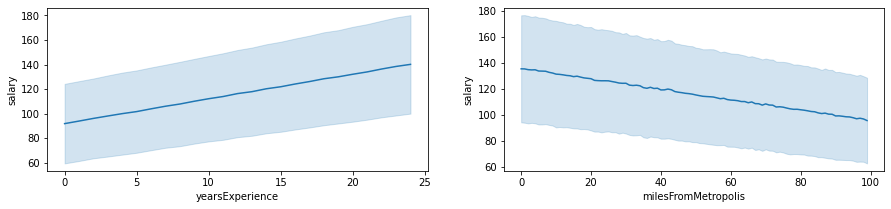

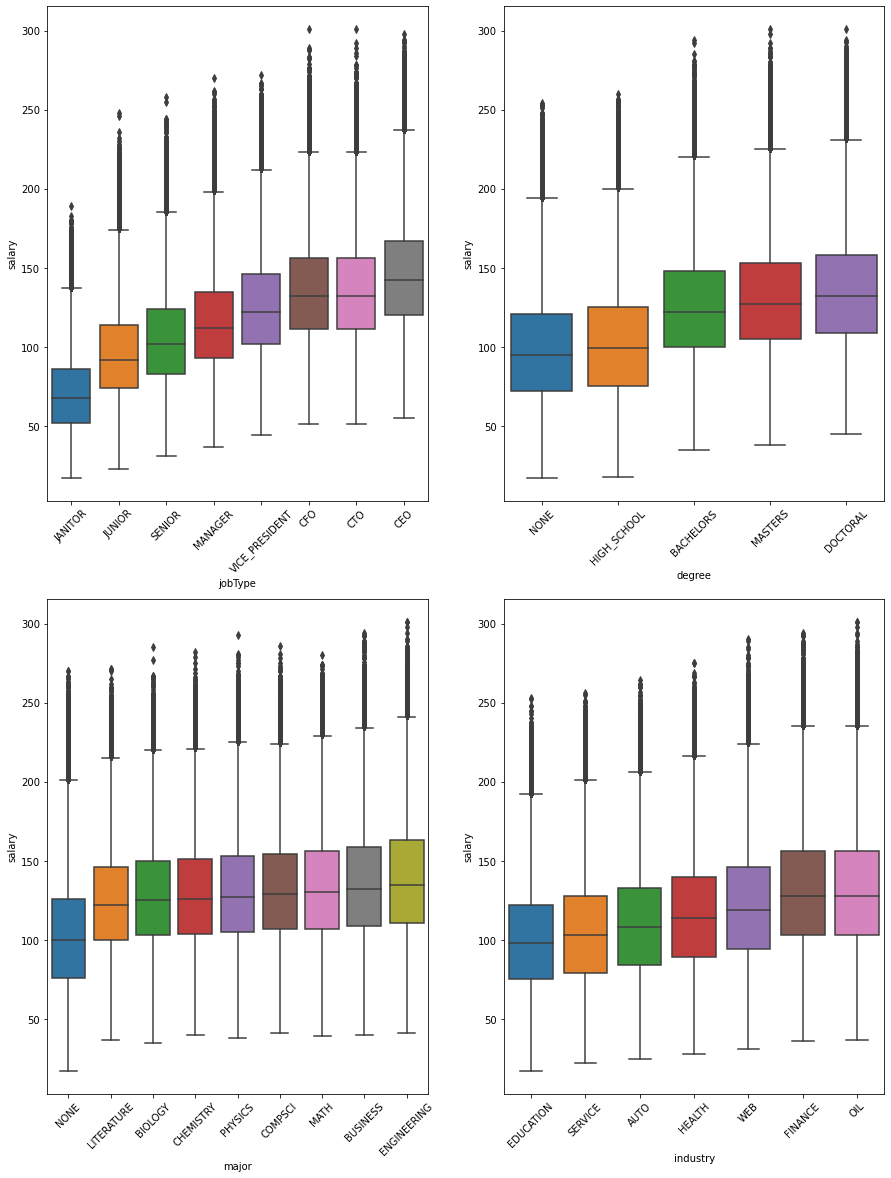

In [27]:
visual_eda_relation(train_df,numerical_column,categorical_column,target_variable)

**From above figure following observations can be seen**

* Farther the job location from metropolis,lesser the salary is.
* More the number of years of experience, higher the salry is.
* In average people with some degree are earning more than without any degree,but people with different degrees have non-   significant difference due to change in majors.
* Education is the least paying industry while OIL industry is paying the highest in average.
* Employees with doctoral degree are paid the highest and without any degrees are paid the least in average

#### Explore correlations with heatmap.

Let's define a function which will show the correlation of different variables with each other through a heatmap.Categorical variables are encoded with mean value of their corresponding salary.

In [28]:
#this function encodes categorical variable with corresponding mean value of salary
def encode_label(df,cat_col):
    cat_dic={}
    cats=df[cat_col].cat.categories.tolist()
    for cat in cats:
        cat_dic[cat]=df[df[cat_col]==cat]['salary'].mean()
    df[cat_col]=df[cat_col].map(cat_dic)

In [29]:
#this function plots heatmap to show correlation among different variables
def visual_correlation(df,num_col,cat_col,target_var):
    for column in cat_col:
        df[column]=df[column].astype("category")
        encode_label(df,column)
        df[column]=pd.to_numeric(df[column])

    fig=plt.figure(figsize=(12,7))
    sns.heatmap(df[num_col+cat_col+[target_var]].corr(),cmap='Greens',annot=True)
    plt.xticks(rotation=45)

**Let's explore correlation with heatmap**

<ipython-input-29-b17ce37d2d4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].astype("category")
<ipython-input-28-11d2a35a1f93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_col]=df[cat_col].map(cat_dic)
<ipython-input-29-b17ce37d2d4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

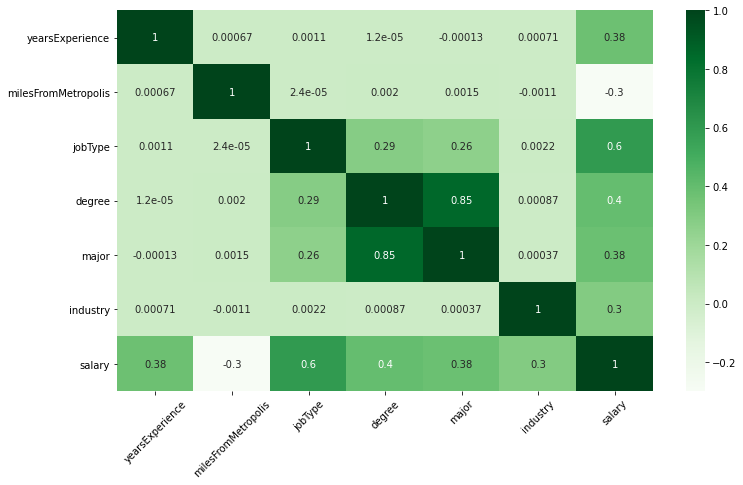

In [30]:
visual_correlation(train_df,numerical_column,categorical_column,target_variable)